In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [2]:
df = pd.read_csv("C:\\Users\\Mr0Wo\\OneDrive\\Рабочий стол\\Git_repositories\\Data-science-cases\\Analytical-cases\\Shift+Enter_MTS\\DataAnalytic\\task2\\Task2_dataset.xlsx - intern_sample.csv")

# Tasks

1. Какова динамика трат посетителей в ресторанах? Есть ли дни наибольшего спроса?
Можно ли проследить тренд? Какой ресторан находится на втором месте по
популярности?
2. Каково распределение покупателей по возрасту в каждом из ресторанов?
3. Как можно визуализировать одновременно 3 параметра: сумму покупок, средний чек
и количество покупателей?

## Task 1
1. Какова динамика трат посетителей в ресторанах? Есть ли дни наибольшего спроса?
Можно ли проследить тренд? Какой ресторан находится на втором месте по
популярности?

In [3]:
df.head()

,client_id,age,business_dt,restaraunt,money_spent_rub
0,6a0c0626b0f63312cd80be53c8d066b1,35-44,2/2/2023,kfc/rostic’s,431
1,f82ab5238a10eb4513bd7c55e61b71a8,45-54,2/21/2023,kfc/rostic’s,595
2,c99f0d761664243baa53c2ab001e3e97,25-34,2/17/2023,kfc/rostic’s,874
3,0aab007224eb05a44502e37fd3ffebe1,18-24,2/5/2023,kfc/rostic’s,1078
4,e33546ac6db226cac783331372461da0,25-34,2/5/2023,kfc/rostic’s,1350


In [4]:
df['business_dt'] = pd.to_datetime(df['business_dt'], format='%m/%d/%Y')
df['business_dt'].agg({'min', 'max'})

min   2023-02-01
max   2023-02-21
Name: business_dt, dtype: datetime64[ns]

### Динамика трат посетителей в ресторанах по неделям

In [5]:
df.groupby([pd.Grouper(key='business_dt', freq='W')])['money_spent_rub'].sum()

business_dt
2023-02-05    4367307
2023-02-12    6977306
2023-02-19    7461704
2023-02-26    2515466
Freq: W-SUN, Name: money_spent_rub, dtype: int64

<Axes: xlabel='business_dt'>

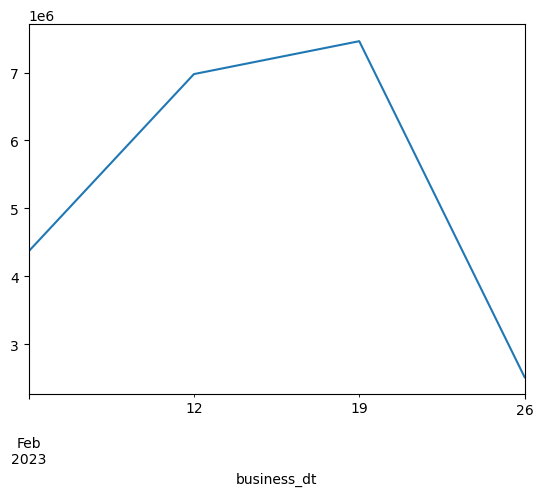

In [6]:
df.groupby([pd.Grouper(key='business_dt', freq='W')])['money_spent_rub'].sum().plot()

### Топ ресторанов 
#### На 2 месте: kfc/rostic’s 	

In [7]:
# По кол-ву совершенных транзацкий
df['restaraunt'].value_counts().sort_values()

burger king      10350
kfc/rostic’s     12745
vkusnoitochka    20989
Name: restaraunt, dtype: int64

<Axes: >

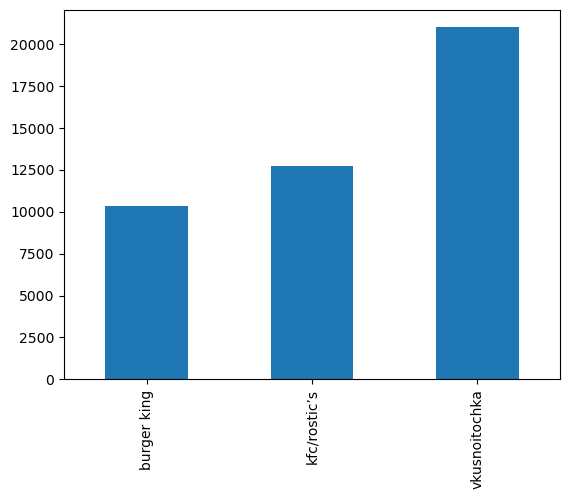

In [8]:
df['restaraunt'].value_counts().sort_values().plot.bar()

In [9]:
# По кол-ву уникальных клиентов
df.groupby('restaraunt')['client_id'].nunique()

restaraunt
burger king       9370
kfc/rostic’s     11287
vkusnoitochka    18118
Name: client_id, dtype: int64

<Axes: xlabel='restaraunt'>

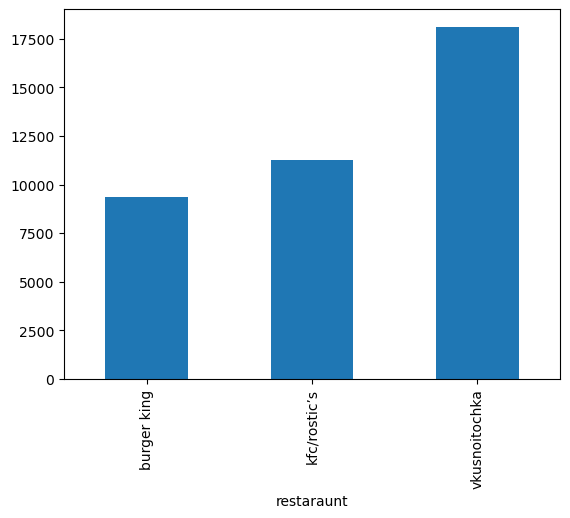

In [10]:
df.groupby('restaraunt')['client_id'].nunique().plot.bar()

In [11]:
t_1 = df.groupby('business_dt')['money_spent_rub'].agg('sum').reset_index()
t_1

,business_dt,money_spent_rub
0,2023-02-01,618767
1,2023-02-02,685909
2,2023-02-03,687264
3,2023-02-04,895839
4,2023-02-05,1479528
5,2023-02-06,1226920
6,2023-02-07,648655
7,2023-02-08,720477
8,2023-02-09,799853
9,2023-02-10,821815


In [12]:
report = df.groupby(['business_dt', 'restaraunt'])['money_spent_rub'].agg('sum').reset_index()
report

,business_dt,restaraunt,money_spent_rub
0,2023-02-01,burger king,117670
1,2023-02-01,kfc/rostic’s,213921
2,2023-02-01,vkusnoitochka,287176
3,2023-02-02,burger king,134301
4,2023-02-02,kfc/rostic’s,233261
...,...,...,...
58,2023-02-20,kfc/rostic’s,528470
59,2023-02-20,vkusnoitochka,721733
60,2023-02-21,burger king,195274
61,2023-02-21,kfc/rostic’s,309863


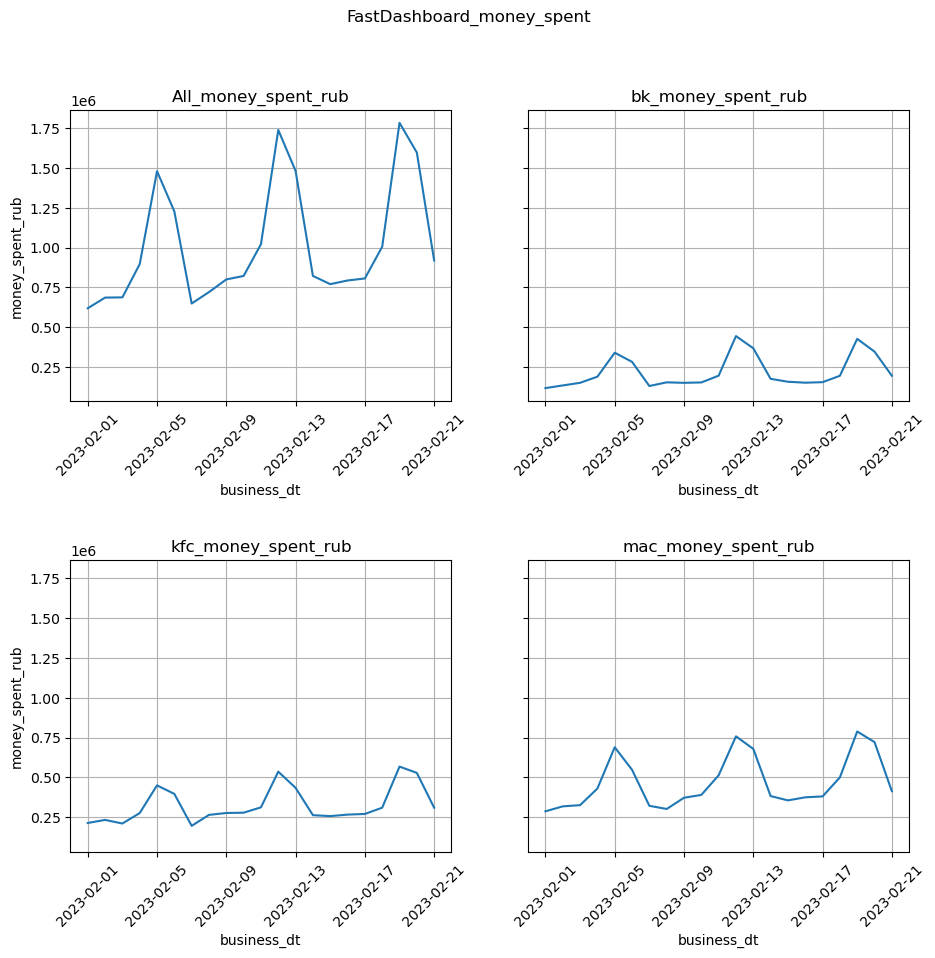

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle('FastDashboard_money_spent')


sns.lineplot(ax=axes[0,0], x=t_1['business_dt'], y=t_1['money_spent_rub']).set(title='All_money_spent_rub')
sns.lineplot(ax=axes[0,1], x=report.loc[report['restaraunt'] == 'burger king']['business_dt'], y=report.loc[report['restaraunt'] == 'burger king']['money_spent_rub']).set(title='bk_money_spent_rub')
sns.lineplot(ax=axes[1,0], x=report.loc[report['restaraunt'] == 'kfc/rostic’s']['business_dt'], y=report.loc[report['restaraunt'] == 'kfc/rostic’s']['money_spent_rub']).set(title='kfc_money_spent_rub')
sns.lineplot(ax=axes[1,1], x=report.loc[report['restaraunt'] == 'vkusnoitochka']['business_dt'], y=report.loc[report['restaraunt'] == 'vkusnoitochka']['money_spent_rub']).set(title='mac_money_spent_rub')

axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()


axes[0,0].tick_params(axis='x', rotation=45)
axes[0,1].tick_params(axis='x', rotation=45)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,1].tick_params(axis='x', rotation=45)
fig.tight_layout(pad=3.0)

## Ответ: 

1. Из графиков видно, что динамика траты денег в ресторанах положительная. Под конец месяца прибыль ресторанов увеличилась
2. Дни наибольшего спроса - [воскресенье, понедельник]
3. Второе место по популярности занимает kfc/rostic’s 

## Task 2

2. Каково распределение покупателей по возрасту в каждом из ресторанов?

In [14]:
df.head()

,client_id,age,business_dt,restaraunt,money_spent_rub
0,6a0c0626b0f63312cd80be53c8d066b1,35-44,2023-02-02,kfc/rostic’s,431
1,f82ab5238a10eb4513bd7c55e61b71a8,45-54,2023-02-21,kfc/rostic’s,595
2,c99f0d761664243baa53c2ab001e3e97,25-34,2023-02-17,kfc/rostic’s,874
3,0aab007224eb05a44502e37fd3ffebe1,18-24,2023-02-05,kfc/rostic’s,1078
4,e33546ac6db226cac783331372461da0,25-34,2023-02-05,kfc/rostic’s,1350


In [15]:
t_2 = df['age'].value_counts().reset_index().rename(columns={'age':'count', 'index':'age'})
t_2

,age,count
0,35-44,12186
1,25-34,10603
2,45-54,8642
3,18-24,6424
4,55-64,4106
5,65+,2123


In [16]:
age_distribution = df.groupby('restaraunt')['age'].value_counts().rename('count').reset_index().sort_values(['restaraunt', 'age'])
age_distribution.head()

,restaraunt,age,count
3,burger king,18-24,1464
1,burger king,25-34,2715
0,burger king,35-44,2945
2,burger king,45-54,1936
4,burger king,55-64,896


[Text(0.5, 1.0, 'mac_age_distribution')]

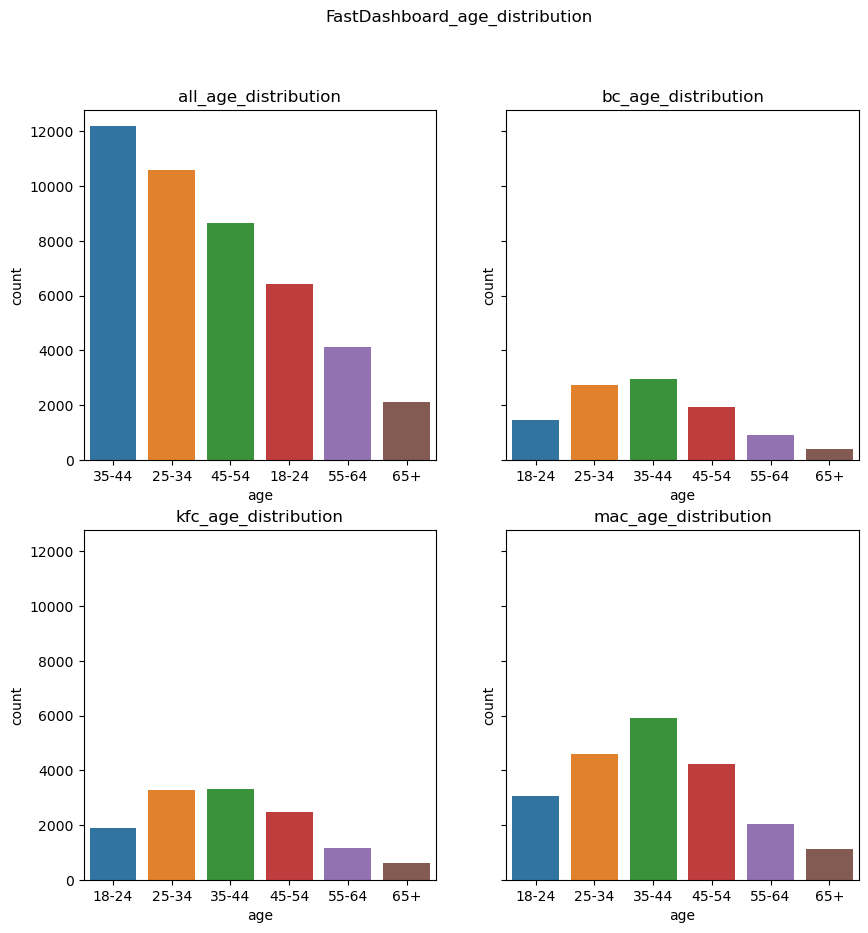

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.suptitle('FastDashboard_age_distribution')

sns.barplot(ax=axes[0,0], x=t_2['age'], y=t_2['count']).set(title='all_age_distribution')
sns.barplot(ax=axes[0,1], x=age_distribution.loc[age_distribution['restaraunt'] == 'burger king']['age'], y=age_distribution.loc[age_distribution['restaraunt'] == 'burger king']['count']).set(title='bc_age_distribution')
sns.barplot(ax=axes[1,0], x=age_distribution.loc[age_distribution['restaraunt'] == 'kfc/rostic’s']['age'], y=age_distribution.loc[age_distribution['restaraunt'] == 'kfc/rostic’s']['count']).set(title='kfc_age_distribution')
sns.barplot(ax=axes[1,1], x=age_distribution.loc[age_distribution['restaraunt'] == 'vkusnoitochka']['age'], y=age_distribution.loc[age_distribution['restaraunt'] == 'vkusnoitochka']['count']).set(title='mac_age_distribution')

## Task 3

3. Как можно визуализировать одновременно 3 параметра: сумму покупок, средний чек
и количество покупателей?

In [18]:
df.head()

,client_id,age,business_dt,restaraunt,money_spent_rub
0,6a0c0626b0f63312cd80be53c8d066b1,35-44,2023-02-02,kfc/rostic’s,431
1,f82ab5238a10eb4513bd7c55e61b71a8,45-54,2023-02-21,kfc/rostic’s,595
2,c99f0d761664243baa53c2ab001e3e97,25-34,2023-02-17,kfc/rostic’s,874
3,0aab007224eb05a44502e37fd3ffebe1,18-24,2023-02-05,kfc/rostic’s,1078
4,e33546ac6db226cac783331372461da0,25-34,2023-02-05,kfc/rostic’s,1350


In [49]:
data_for_graph = df.groupby('restaraunt')['client_id'].nunique().reset_index().rename(columns={'client_id':'client_count'})

In [52]:
data_for_graph = data_for_graph.merge(df.groupby('restaraunt')['money_spent_rub'].mean().reset_index().rename(columns={'money_spent_rub': 'money_spent_rub_mean'}))

In [58]:
data_for_graph = data_for_graph.merge(df.groupby('restaraunt')['money_spent_rub'].sum().reset_index())

In [60]:
data_for_graph['money_spent_rub'] = data_for_graph['money_spent_rub'] / 10**4

In [61]:
data_for_graph

,restaraunt,client_count,money_spent_rub_mean,money_spent_rub
0,burger king,9370,445.707826,461.3076
1,kfc/rostic’s,11287,537.741703,685.3518
2,vkusnoitochka,18118,469.540664,985.5189


In [81]:
data_for_graph.loc[data_for_graph['restaraunt'] == 'burger king'].iloc[:, 3]

0    461.3076
Name: money_spent_rub, dtype: float64

In [82]:
names = ['burger king', 'kfc/rostic’s', 'vkusnoitochka']
for i in range(1):
    print(data_for_graph.loc[data_for_graph['restaraunt'] == names[i]].iloc[:, 3])

0    461.3076
Name: money_spent_rub, dtype: float64


In [84]:
def cubes(size, pos_x, pos_y, pos_z, color, name):
    # create points
    x, y, z = np.meshgrid(
        np.linspace(pos_x-size, pos_x+size, 2), 
        np.linspace(pos_y-size, pos_y+size, 2), 
        np.linspace(pos_z-size, pos_z+size, 2),
    )
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    
    return go.Mesh3d(x=x, y=y, z=z, alphahull=1, flatshading=True, color=color,
                     lighting={'diffuse': 0.1, 'specular': 2.0, 'roughness': 0.5}, name=name)

fig = go.Figure()
# set edge length of cubes
size = 150

names = ['burger king', 'kfc/rostic’s', 'vkusnoitochka']
colors = ['rgba(94, 51, 51, 1)', 'red', 'yellow']
for i in range(3):
    fig.add_trace(cubes(size,
                        data_for_graph.loc[data_for_graph['restaraunt'] == names[i]].iloc[:, 3],
                        data_for_graph.loc[data_for_graph['restaraunt'] == names[i]].iloc[:, 2],
                        data_for_graph.loc[data_for_graph['restaraunt'] == names[i]].iloc[:, 1],
                        colors[i],
                        names[i]))



fig.update_layout(scene = dict(
                    xaxis_title='money_spent_rub_sum / 10^4',
                    yaxis_title='money_spent_rub_mean',
                    zaxis_title='client count'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()